In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from api_keys import g_key
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
file = 'thefile.csv'
df = pd.read_csv(file)
df = df.loc[(df['Climate Zone'] == 'Csb') | 
           (df['Climate Zone'] == 'Cfa') |
           (df['Climate Zone'] == 'Cfb') |
           (df['Climate Zone'] == 'Csa') |
           (df['Climate Zone'] == 'Dfb') |
           (df['Climate Zone'] == 'BSk') |
           (df['Climate Zone'] == 'Dfa') |
           (df['Climate Zone'] == 'BWk') |
           (df['Climate Zone'] == 'BSh') |
           (df['Climate Zone'] == 'Dfc') ]


cz=df['Climate Zone']
price = df.price
points = df.points


In [3]:
def anova(x,y):
    anova_df = pd.DataFrame({'cz':x,'p':y})
    group1 = anova_df[anova_df["cz"] == 'Csb']["p"]
    group2 = anova_df[anova_df["cz"] == 'Cfa']["p"]
    group3 = anova_df[anova_df["cz"] == 'Cfb']["p"]
    group4 = anova_df[anova_df["cz"] == 'Csa']["p"]
    group5 = anova_df[anova_df["cz"] == 'Dfb']["p"]
    group6 = anova_df[anova_df["cz"] == 'BSk']["p"]
    group7 = anova_df[anova_df["cz"] == 'Dfa']["p"]
    group8 = anova_df[anova_df["cz"] == 'BWk']["p"]
    group9 = anova_df[anova_df["cz"] == 'BSh']["p"]
    group10 = anova_df[anova_df["cz"] == 'Dfc']["p"]
    return stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10)

In [23]:
def anovaplot(x,y):
    anova_df = pd.DataFrame({'cz':x,'p':y})
    anova_df.boxplot('p', by='cz',figsize=(20,10) )
    plt.suptitle("")
    
    #plt.legend()
    #plt.tight_layout()

In [13]:
anova(cz,price)


F_onewayResult(statistic=4.827274117585681, pvalue=1.7907644635220779e-06)

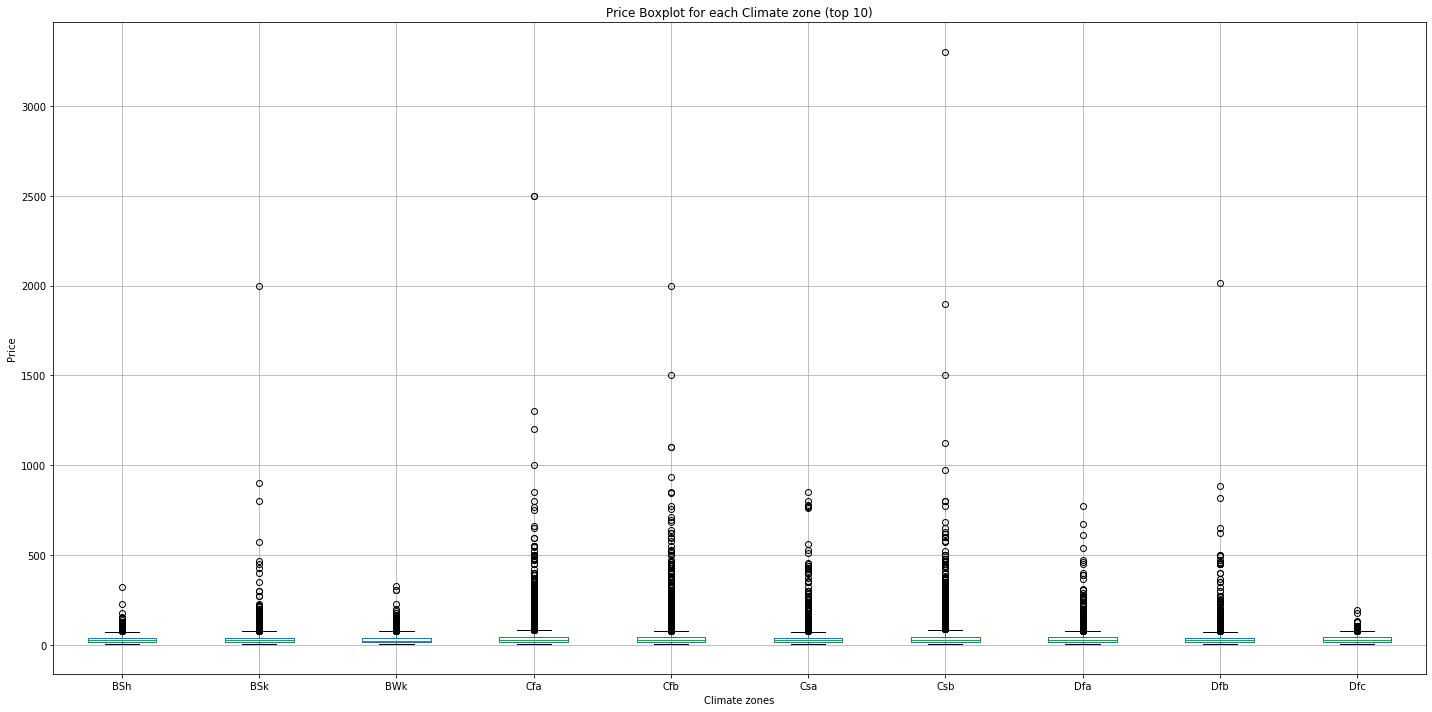

In [25]:
_=anovaplot(cz,price)
#plt.ylim(0,100)
_ =plt.ylabel('Price')
_=plt.xlabel('Climate zones')
_=plt.title('Price Boxplot for each Climate zone (top 10)')
_=plt.tight_layout()
plt.savefig('../pics/priceclimatelrg.png');

In [26]:
anova(cz,points)

F_onewayResult(statistic=14.39373088966597, pvalue=1.5224153910693889e-23)

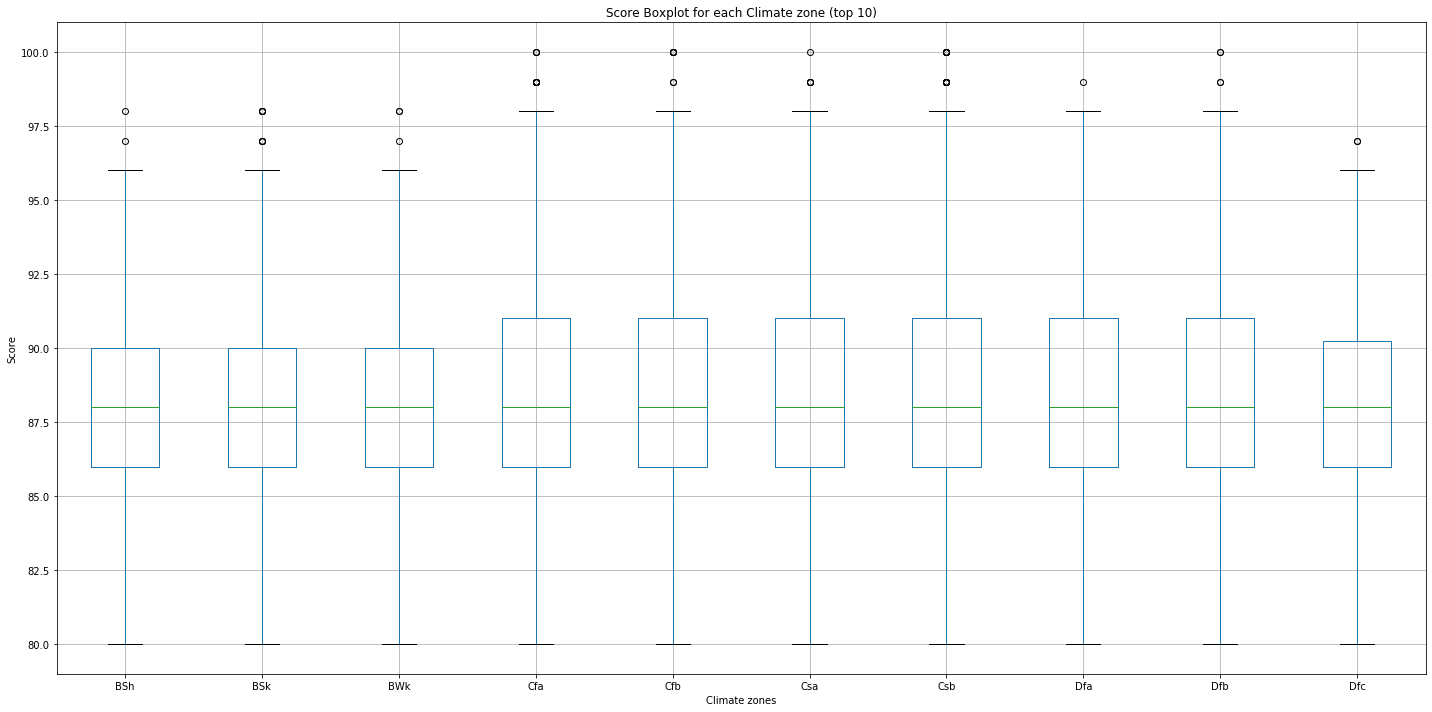

In [27]:
anovaplot(cz,points)
_ =plt.ylabel('Score')
_=plt.xlabel('Climate zones')
_=plt.title('Score Boxplot for each Climate zone (top 10)')
_=plt.tight_layout()
plt.savefig('../pics/scoreclimate.png');

In [28]:
df2 = pd.read_csv(file)


#df['Event'] = np.where((df.Event == 'Painting'),'Art',df.Event)


df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Cfa'),1,df2['Climate Zone'])
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Csb'),2,df2['Climate Zone'])
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Csa'),22,df2['Climate Zone'])
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Cfb'),3,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Dfb'),4,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Dfa'),5,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'BWk'),6,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'BSk'),7,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'BSh'),8,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'ET'),9,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Dfc'),10,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Af'),11,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Cwb'),12,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Aw'),13,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'BWh'),14,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Dsb'),15,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Am'),16,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Cwa'),17,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'As'),18,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Cwc'),19,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Cfc'),20,df2['Climate Zone']) 
df2['Climate Zone'] = np.where((df2['Climate Zone'] == 'Dsc'),21,df2['Climate Zone']) 
df2 = df2.loc[df2['Climate Zone']  != 'not avail']
df2
            

,Unnamed: 0,country,description,points,price,region_1,taster_name,title,variety,winery,Lat,Lng,heat weights,year,Climate Zone,Climate Zone Desc.,raiting
0,6760,Italy,Thick as molasses and dark as caramelized brow...,100,210.0,Vin Santo di Montepulciano,not avail,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile,Avignonesi,43.173566,11.933298,20,1995.0,2,"Mediterranean, warm summer",100
1,111871,France,"Full of ripe fruit, opulent and concentrated, ...",100,848.0,Pessac-Léognan,Roger Voss,Château Haut-Brion 2014 Pessac-Léognan,Bordeaux-style White Blend,Château Haut-Brion,44.816652,-0.608612,20,2014.0,3,"Marine west coast, warm summer",100
2,32126,France,This is a fabulous wine from the greatest Cham...,100,259.0,Champagne,Roger Voss,Krug 2002 Brut (Champagne),Champagne Blend,Krug,38.518744,-122.480955,20,2002.0,3,"Marine west coast, warm summer",100
3,107357,US,This wine dazzles with perfection. Sourced fro...,100,450.0,Sonoma County,not avail,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend,Verité,42.372799,-72.498225,20,2007.0,4,"Humid continental, no dry season, warm summer",100
4,103526,US,In 2005 Charles Smith introduced three high-en...,100,80.0,Columbia Valley (WA),Paul Gregutt,Charles Smith 2006 Royal City Syrah (Columbia ...,Syrah,Charles Smith,33.965218,-80.350430,20,2006.0,1,"Humid subtropical, no dry season",100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113346,48578,Argentina,Raw cherry and plum aromas are resiny and sugg...,80,15.0,Agrelo,Michael Schachner,Lamadrid 2014 Single Vineyard Cabernet Sauvign...,Cabernet Sauvignon,Lamadrid,27.050596,-101.793233,0,2014.0,22,"Mediterranean, hot summer",0
113347,48577,Spain,Vague melon aromas are strange at best and off...,80,10.0,Cariñena,Michael Schachner,Bodegas San Valero 2014 Particular White (Cari...,White Blend,Bodegas San Valero,41.337046,-1.219061,0,2014.0,3,"Marine west coast, warm summer",0
113348,48576,Argentina,Stalky cranberry aromas are incomplete and pro...,80,20.0,Valle de Uco,Michael Schachner,Viñedos Altamira Valley 2011 VAV Malbec (Valle...,Malbec,Viñedos Altamira Valley,20.680793,-100.327033,0,2011.0,1,"Humid subtropical, no dry season",0
113349,48575,Spain,Dusty apple and papaya aromas lack fortitude. ...,80,7.0,La Mancha,Michael Schachner,Despierta 2014 Chardonnay (La Mancha),Chardonnay,Despierta,39.279561,-3.097702,0,2014.0,4,"Humid continental, no dry season, warm summer",0


In [29]:
lat = df2['Lat'].astype('int64')
points = df2['points'].astype('int64')




In [30]:
def lireg(x,y):
    (slope, intercept, r_value, p_value, std_err) = linregress(x, y)
    regress_value = x*slope+intercept
    line_eq = 'y = ' +str(round(slope,2)) + ' x + ' + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_value,'r-')
    plt.annotate(r_value,(x.min()+1,y.min()+1),c='black',size=15)
    print(f'The r-scared is: {r_value}')

In [31]:
df2.head(1)

,Unnamed: 0,country,description,points,price,region_1,taster_name,title,variety,winery,Lat,Lng,heat weights,year,Climate Zone,Climate Zone Desc.,raiting
0,6760,Italy,Thick as molasses and dark as caramelized brow...,100,210.0,Vin Santo di Montepulciano,not avail,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile,Avignonesi,43.173566,11.933298,20,1995.0,2,"Mediterranean, warm summer",100


In [32]:
df_lat_less = df2.loc[df2["Lat"] < 0]
df_lat_more = df2.loc[df2["Lat"] > 0]

In [38]:
def lireg2(x,y):
    (slope, intercept, r_value, p_value, std_err) = linregress(x, y)
    regress_value = x*slope+intercept
    line_eq = 'y = ' +str(round(slope,2)) + ' x + ' + str(round(intercept,2))
    plt.plot(x,regress_value,'r-')
    plt.annotate(r_value,(x.min()+1,y.min()+1),c='black',size=15)
    print(f'The r-scared is: {r_value}')

The r-scared is: -0.09236161366128982
The r-scared is: 0.10854047676557858


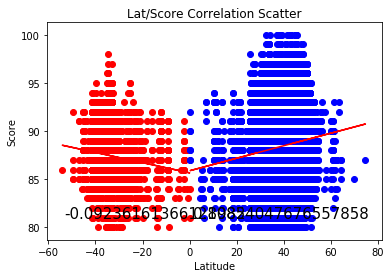

In [39]:
fig, ax1 = plt.subplots()

ax1.scatter(df_lat_less["Lat"], df_lat_less["points"],c="red")
ax1.scatter(df_lat_more["Lat"], df_lat_more["points"],c="blue")

lireg2(df_lat_less["Lat"], df_lat_less["points"])
lireg2(df_lat_more["Lat"], df_lat_more["points"])

_=plt.ylabel('Score')
_=plt.xlabel('Latitude')
_=plt.title('Lat/Score Correlation Scatter')

The r-scared is: 0.1042791306546638


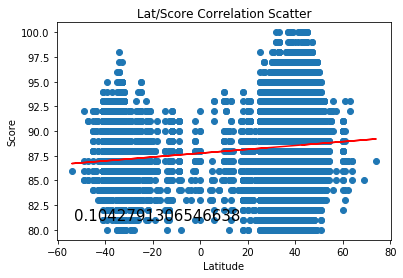

In [20]:
lireg(lat,points)
_ =plt.ylabel('Score')
_=plt.xlabel('Latitude')
_=plt.title('Lat/Score Correlation Scatter')
plt.split in 2(by=0)

plt.savefig('../pics/latscore.png');


In [21]:
lireg(lat,price)

The r-scared is: -0.09535161063138015


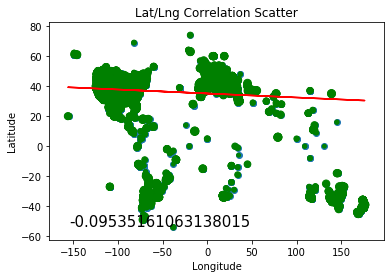

In [22]:

lireg(lng,lat)
plt.scatter(lng,lat,s=df2.raiting,c='green')
_ =plt.ylabel('Latitude')
_=plt.xlabel('Longitude')
_=plt.title('Lat/Lng Correlation Scatter')

plt.savefig('../pics/lnglat.png');

The r-scared is: 0.4139236204167073


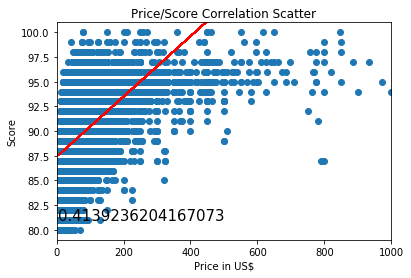

In [119]:

lireg(price,points)
year = df2['year'].astype('int64')
_=plt.ylim(79,101)
plt.xlim(0,1000)
_ =plt.ylabel('Score')
_=plt.xlabel('Price in US$')
_=plt.title('Price/Score Correlation Scatter')

plt.savefig('../pics/pricescore.png');

The r-scared is: 0.06920249287389671


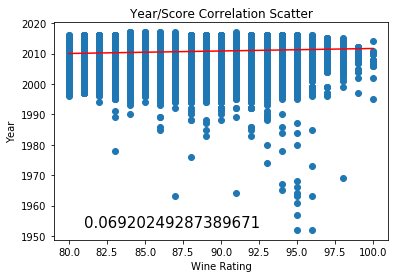

In [120]:
lireg(points,year)
#_=plt.ylim(79,101)
#plt.xlim(0,1000)
_ =plt.ylabel('Year')
_=plt.xlabel('Wine Rating')
_=plt.title('Year/Score Correlation Scatter')

plt.savefig('../pics/yearscore.png');

The r-scared is: -0.09245944216426968


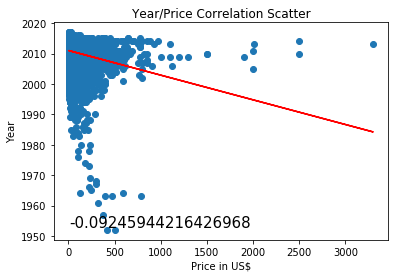

In [121]:
lireg(price,year)
#_=plt.ylim(79,101)
#plt.xlim(0,1000)
_ =plt.ylabel('Year')
_=plt.xlabel('Price in US$')
_=plt.title('Year/Price Correlation Scatter')

plt.savefig('../pics/yearprice.png');

The r-scared is: -0.01162055895660395


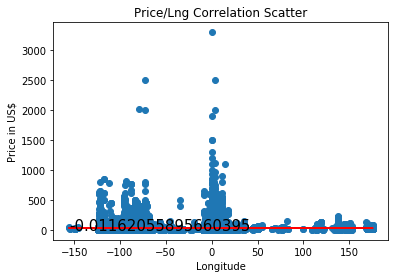

In [122]:
lireg(lng,price)
#_=plt.ylim(79,101)
#plt.xlim(0,1000)
_ =plt.ylabel('Price in US$')
_=plt.xlabel('Longitude')
_=plt.title('Price/Lng Correlation Scatter')

plt.savefig('../pics/pricelng.png');

The r-scared is: 0.011792353042180213


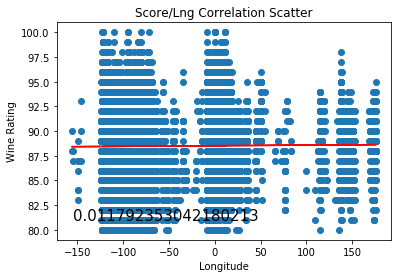

In [123]:
lireg(lng,points)
#_=plt.ylim(79,101)
#plt.xlim(0,1000)
_ =plt.ylabel('Wine Rating')
_=plt.xlabel('Longitude')
_=plt.title('Score/Lng Correlation Scatter')

plt.savefig('../pics/scorelng.png');